In [24]:
import numpy as np
import pickle as pkl
import os
import itertools as it
import functools as ft
import multiprocessing as mp
import time
import sys
import gc

path_to_data = 'pickle_files/'

motifs_reference = list(map(str, np.genfromtxt('./motifsSimple.csv', dtype=np.str_)))
motifs_id_dict = {x:y for y,x in enumerate(motifs_reference)}                        

n = len(motifs_reference)

def coord_helper(name):
    global n
    global motifs_id_dict

    l,r = name.split('|')
    l = motifs_id_dict[l]
    r = motifs_id_dict[r]
    return l*n+r

In [16]:
def collate_dat(i, fact):
    global n
    global t
    
    for k in range(t):    
        local_names = []
        for f in range(fact):
            print('combining_names_'+str(i*fact*t+f*t+k))
            sys.stdout.flush()
            with open('pickle_files/names_'+str(i*fact*t+f*t+k)+'.pickle', 'rb') as fil:
                local_names += [pkl.load(fil)]

        local_names = np.fromiter(it.chain.from_iterable(local_names), dtype=np.int64)
                
        print('writing_collated_names_'+str(i*t+k))
        np.savez_compressed('collate_names_'+str(i*t+k)+'.npz', local_names)

        del local_names

        gc.collect()

        local_dat = []
        for f in range(fact):
            print('combining_mat_'+str(i*fact*t+f*t+k))
            sys.stdout.flush()
            with open('pickle_files/mat_'+str(i*fact*t+f*t+k)+'.pickle', 'rb') as fil:
                local_dat += [pkl.load(fil)]
                
        local_dat = np.fromiter(it.chain.from_iterable(local_dat), dtype=np.float64)

        print('writing_collated_dat_'+str(i*t+k))
        np.savez_compressed('collate_dat_'+str(i*t+k)+'.npz', local_dat)

proc_list = []

t = 4
    
for i in range(8):
    p = mp.Process(target = collate_dat, args=(i,2))
    p.start()
    proc_list.append(p)
    
for i in range(8):
    proc_list[i].join(timeout=21600)

combining_names_0
combining_names_8
combining_names_16
combining_names_24
combining_names_32
combining_names_40
combining_names_48
combining_names_56
combining_names_12
combining_names_36
combining_names_28
combining_names_44
combining_names_20
combining_names_52
combining_names_4
combining_names_60
writing_collated_names_8
writing_collated_names_0
writing_collated_names_12
writing_collated_names_16
writing_collated_names_20
writing_collated_names_24
writing_collated_names_4
writing_collated_names_28
combining_mat_16
combining_mat_0
combining_mat_20
combining_mat_24
combining_mat_4
combining_mat_32
combining_mat_40
combining_mat_28
combining_mat_36
combining_mat_44
combining_mat_48
combining_mat_8
writing_collated_dat_8
combining_mat_52
writing_collated_dat_0
combining_mat_12
writing_collated_dat_12
writing_collated_dat_16
writing_collated_dat_20
combining_mat_56
writing_collated_dat_24
writing_collated_dat_4
combining_mat_60
writing_collated_dat_28
combining_names_17
combining_names_1

In [17]:
def collate_dat(i, fact):
    global n
    global t
    
    for k in range(t):    
        local_names = []
        for f in range(fact):
            print('combining_names_'+str(i*fact*t+f*t+k))
            sys.stdout.flush()
            local_names += [np.load('collate_names_'+str(i*fact*t+f*t+k)+'.npz')['arr_0']]

        local_names = np.hstack(local_names)
                
        print('writing_collated_names_'+str(i*t+k))
        np.savez_compressed('collate_names_16_'+str(i*t+k)+'.npz', local_names)

        del local_names

        gc.collect()

        local_dat = []
        for f in range(fact):
            print('combining_mat_'+str(i*fact*t+f*t+k))
            sys.stdout.flush()
            local_dat += [np.load('collate_dat_'+str(i*fact*t+f*t+k)+'.npz')['arr_0']]
                
        local_dat = np.hstack(local_dat)

        print('writing_collated_dat_'+str(i*t+k))
        np.savez_compressed('collate_dat_16_'+str(i*t+k)+'.npz', local_dat)

proc_list = []

t = 2
    
for i in range(8):
    p = mp.Process(target = collate_dat, args=(i,2))
    p.start()
    proc_list.append(p)
    
for i in range(8):
    proc_list[i].join(timeout=21600)

combining_names_4
combining_names_0
combining_names_8
combining_names_12
combining_names_16
combining_names_20
combining_names_24
combining_names_28
combining_names_10
combining_names_2
combining_names_14
combining_names_18
combining_names_6
combining_names_30
combining_names_26
combining_names_22
writing_collated_names_0
writing_collated_names_8
writing_collated_names_4
writing_collated_names_6
writing_collated_names_2
writing_collated_names_12
writing_collated_names_10
writing_collated_names_14
combining_mat_20
combining_mat_28
combining_mat_8
combining_mat_12
combining_mat_0
combining_mat_24
combining_mat_4
combining_mat_16
combining_mat_22
combining_mat_30
combining_mat_14
combining_mat_10
combining_mat_2
combining_mat_6
combining_mat_18
combining_mat_26
writing_collated_dat_10
writing_collated_dat_14
writing_collated_dat_6
writing_collated_dat_4
writing_collated_dat_0
writing_collated_dat_2
writing_collated_dat_8
writing_collated_dat_12
combining_names_21
combining_names_13
combin

In [18]:
def collate_dat(i, fact):
    global n
    global t
    
    for k in range(t):    
        local_names = []
        for f in range(fact):
            print('combining_names_'+str(i*fact*t+f*t+k))
            sys.stdout.flush()
            local_names += [np.load('collate_names_16_'+str(i*fact*t+f*t+k)+'.npz')['arr_0']]

        local_names = np.hstack(local_names)
                
        print('writing_collated_names_'+str(i*t+k))
        np.savez_compressed('collate_names_8_'+str(i*t+k)+'.npz', local_names)

        del local_names

        gc.collect()

        local_dat = []
        for f in range(fact):
            print('combining_mat_'+str(i*fact*t+f*t+k))
            sys.stdout.flush()
            local_dat += [np.load('collate_dat_16_'+str(i*fact*t+f*t+k)+'.npz')['arr_0']]
                
        local_dat = np.hstack(local_dat)

        print('writing_collated_dat_'+str(i*t+k))
        np.savez_compressed('collate_dat_8_'+str(i*t+k)+'.npz', local_dat)

proc_list = []

t = 1
    
for i in range(8):
    p = mp.Process(target = collate_dat, args=(i,2))
    p.start()
    proc_list.append(p)
    
for i in range(8):
    proc_list[i].join(timeout=21600)

combining_names_0
combining_names_2
combining_names_4
combining_names_6
combining_names_8
combining_names_10
combining_names_12
combining_names_14
combining_names_9
combining_names_1
combining_names_3
combining_names_11
combining_names_13
combining_names_5
combining_names_15
combining_names_7
writing_collated_names_0
writing_collated_names_4
writing_collated_names_1
writing_collated_names_2
writing_collated_names_5
writing_collated_names_7
writing_collated_names_3
writing_collated_names_6
combining_mat_0
combining_mat_14
combining_mat_6
combining_mat_4
combining_mat_8
combining_mat_10
combining_mat_12
combining_mat_2
combining_mat_1
combining_mat_15
combining_mat_7
combining_mat_5
combining_mat_9
combining_mat_11
combining_mat_3
combining_mat_13
writing_collated_dat_0
writing_collated_dat_7
writing_collated_dat_3
writing_collated_dat_4
writing_collated_dat_2
writing_collated_dat_5
writing_collated_dat_6
writing_collated_dat_1


In [19]:
def collate_dat(i, fact):
    global n
    global t
    
    for k in range(t):    
        local_names = []
        for f in range(fact):
            print('combining_names_'+str(i*fact*t+f*t+k))
            sys.stdout.flush()
            local_names += [np.load('collate_names_8_'+str(i*fact*t+f*t+k)+'.npz')['arr_0']]

        local_names = np.hstack(local_names)
                
        print('writing_collated_names_'+str(i*t+k))
        np.savez_compressed('collate_names_2_'+str(i*t+k)+'.npz', local_names)

        del local_names

        gc.collect()

        local_dat = []
        for f in range(fact):
            print('combining_mat_'+str(i*fact*t+f*t+k))
            sys.stdout.flush()
            local_dat += [np.load('collate_dat_8_'+str(i*fact*t+f*t+k)+'.npz')['arr_0']]
                
        local_dat = np.hstack(local_dat)

        print('writing_collated_dat_'+str(i*t+k))
        np.savez_compressed('collate_dat_2_'+str(i*t+k)+'.npz', local_dat)

proc_list = []

t = 1
    
for i in range(2):
    p = mp.Process(target = collate_dat, args=(i,4))
    p.start()
    proc_list.append(p)
    
for i in range(2):
    proc_list[i].join(timeout=21600)

combining_names_0
combining_names_4
combining_names_5
combining_names_1
combining_names_6
combining_names_2
combining_names_7
combining_names_3
writing_collated_names_1
writing_collated_names_0
combining_mat_4
combining_mat_0
combining_mat_5
combining_mat_1
combining_mat_6
combining_mat_2
combining_mat_7
combining_mat_3
writing_collated_dat_1
writing_collated_dat_0


In [20]:
dat = np.zeros((n*n,))

local_names = np.load('collate_names_2_0.npz')['arr_0']
local_dat = np.load('collate_dat_2_0.npz')['arr_0']

np.put(dat, local_names, local_dat)

local_names = np.load('collate_names_2_1.npz')['arr_0']
local_dat = np.load('collate_dat_2_1.npz')['arr_0']

np.put(dat, local_names, local_dat)

In [21]:
np.savez('complete_distances.npz', dat)

In [27]:
dat = dat.reshape((n,n))
np.savez('complete_distances.npz', dat)

In [92]:
#dat = np.load('complete_distances.npz')['arr_0']

In [41]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def histogram(data,myBins,w,h,figTitle='none',save='do not save'):
    print("Mean: %5.3f | Median: %5.3f | Min: %5.3f | Max: %5.3f" % (np.mean(data),np.median(data),min(data),max(data)))
    hist, bins = np.histogram(data,bins=myBins)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.figure(num=None, figsize=(w,h), dpi=80, facecolor='w', edgecolor='k')
    plt.bar(center, hist, align='center', width=width)
    if save=='save':
        plt.savefig('hist.png')
    plt.show()

Mean: 69.575 | Median: 70.000 | Min: 19.000 | Max: 93.000


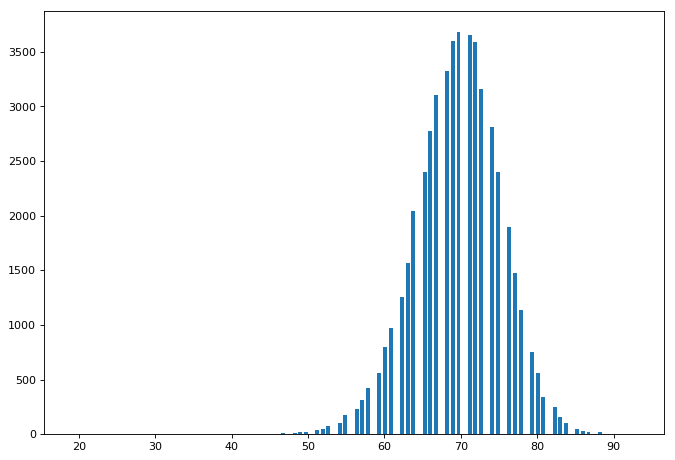

In [43]:
histogram(np.random.choice(dat[np.triu_indices(n=n, k=1)], 50000),100,10,7,save='save')

In [113]:
num_slices = 15
for i in range(num_slices):
    score_list = []
    for j in range(num_slices):
        score_list += [str(np.round(np.mean(dat[(n//num_slices)*i:n//num_slices*(i+1), (n//num_slices)*j:(n//num_slices)*(j+1)]),1))]
        
    print('\t'.join(score_list))
        

34.8	69.6	69.6	69.6	69.6	69.6	69.6	69.6	69.6	69.6	69.6	69.6	69.6	69.5	69.6
0.0	34.8	69.6	69.6	69.6	69.6	69.6	69.6	69.6	69.6	69.6	69.6	69.6	69.5	69.6
0.0	0.0	34.8	69.6	69.6	69.6	69.6	69.6	69.5	69.6	69.6	69.6	69.6	69.5	69.6
0.0	0.0	0.0	34.8	69.5	69.5	69.5	69.5	69.5	69.6	69.5	69.5	69.6	69.5	69.6
0.0	0.0	0.0	0.0	34.8	69.6	69.5	69.6	69.5	69.6	69.5	69.6	69.6	69.5	69.6
0.0	0.0	0.0	0.0	0.0	34.8	69.6	69.6	69.5	69.6	69.6	69.6	69.6	69.5	69.6
0.0	0.0	0.0	0.0	0.0	0.0	34.8	69.5	69.5	69.6	69.5	69.6	69.6	69.5	69.6
0.0	0.0	0.0	0.0	0.0	0.0	0.0	34.8	69.5	69.6	69.5	69.6	69.6	69.5	69.6
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	34.7	69.6	69.5	69.5	69.6	69.5	69.6
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	34.8	69.6	69.6	69.6	69.5	69.6
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	34.8	69.6	69.6	69.5	69.6
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	34.8	69.6	69.5	69.6
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	34.8	69.5	69.6
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	34.7	69.5
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0

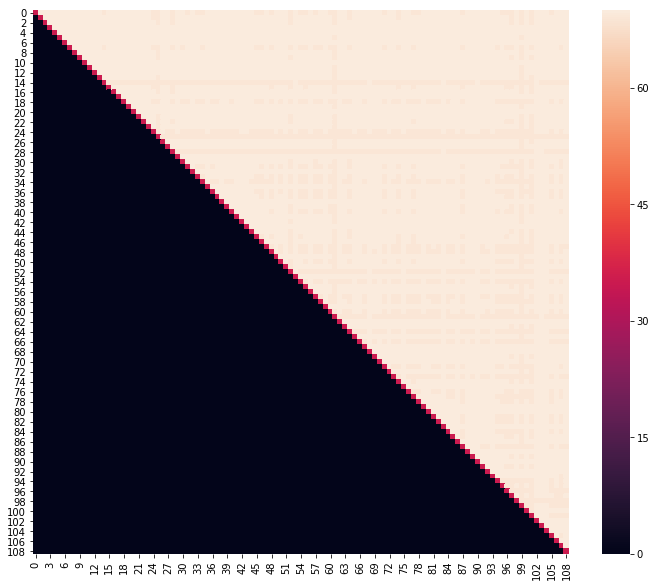

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(12,10))
import seaborn as sns
num_slices = 109
out_list = []
for i in range(num_slices):
    score_list = []
    for j in range(num_slices):
        out_list += [np.round(np.mean(dat[(n//num_slices)*i:n//num_slices*(i+1), (n//num_slices)*j:(n//num_slices)*(j+1)]),0)]
        
sns.heatmap(np.array(out_list).reshape((num_slices,num_slices)))
        

In [33]:
dat = -(dat - np.max(dat))
dat[np.tril_indices(n=n)] = 0.0

In [34]:
np.savez_compressed('flipped_distances.npz', dat)

In [73]:
np.sum(dat>=60.0)/(n*(n-1)/2)

0.0001949207881295316

In [24]:
max_x, max_y = np.where(dat==94.0)

In [37]:
np.sum(dat==94.0)

6445

In [44]:
def find_below(dat, n, thresh):
    mask = dat <= thresh
    mask[np.tril_indices(n=n)] = False
    return np.where(mask)

In [40]:
zeros = find_below(dat, n, 0.0)
zeros

(array([5826]), array([12113]))

In [45]:
thirties = find_below(dat, n, 30.0)
thirties

(array([    4,    15,    18, ..., 67922, 67922, 67958]),
 array([39895, 52702, 43525, ..., 67962, 68096, 68096]))

In [104]:
from numba import jit
from numba import njit
from numba import vectorize

@jit(parallel=True)
def jit_mask(dat, thresh):
    return dat <= thresh

@jit(parallel=True)
def jit_tril_zero(dat, n):
    for i in range(n):
        for j in range(i):
            dat[i,j] = False
    return dat
                
@jit(parallel=True)
def jit_where(dat):
    return np.where(dat)
    
def find_pairs_below(thresh):
    global n
    global dat
    global motifs_reference
    
    mots = np.array(motifs_reference, dtype=np.str_)
    get_helper = ft.partial(get_names, motifs_reference=motifs_reference)
    
    x_locs, y_locs = jit_where(jit_tril_zero(jit_mask(dat, thresh),n))
    
    return list(zip(*(mots[x_locs], mots[y_locs])))

In [105]:
%%timeit

thirties = find_pairs_below(30.0)

5.22 s ± 61.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [91]:
len(thirties)

371312

In [94]:
import pandas as pd
pd.DataFrame(thirties).to_csv('below_thirty_pairs.csv', header=False, index=False)

In [ ]:
np.unravel_index(dat[np.triu_indices(n=n, k=1)] == 0.0, dat.shape)

In [15]:
np.array(4670765647, dtype=np.int64)

array(4670765647)

In [95]:
0.0001949*(n-1)*n/2


455159.45246969996

In [96]:
num_combos = n*(n-1)/2

In [97]:
(np.sum(dat<=10)-num_combos)/num_combos

0.010758388032435687